In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,6)  #to handle default matplotlib values

In [2]:
driver_data=pd.read_csv('C:\\Users\\hp\\Documents\\DATA SCIENCE\\data_sets\\Demo Datasets\\Lesson 7\\driver-data.csv')

In [3]:
driver_data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
driver_data.info

<bound method DataFrame.info of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

In [5]:
driver_data.shape

(4000, 3)

In [6]:
driver_data.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [8]:
driver_data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans=KMeans(n_clusters=2) #the minimum number of clusters that can exist in a data point is 2

In [11]:
df_analyze=driver_data.drop('id', axis=1) #we drop the 'id' column because its not contributing to the analysis

In [12]:
#fit the data on the algorithm
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [13]:
#we determine the clusters centroid vectors
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [14]:
#we print the unique labels
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [15]:
len(kmeans.labels_)

4000

In [16]:
#we check how many unique drivers are there in the first and second drivers
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [18]:
unique,count=np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, count)))

{0: 800, 1: 3200}


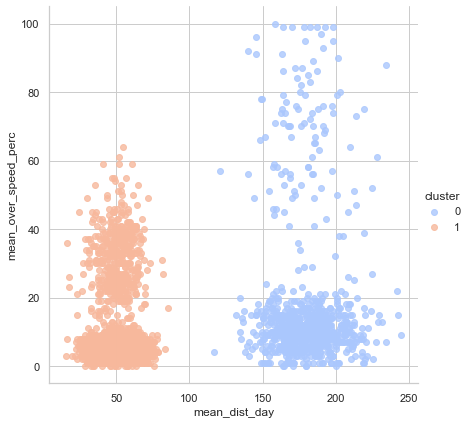

In [19]:
df_analyze['cluster']=kmeans.labels_
sb.set_style('whitegrid')
sb.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [20]:
#we increase the number of clusters say 4
kmeans=KMeans(n_clusters=4)

In [21]:
df_analyze2=driver_data.drop('id', axis=1)

In [22]:
#we fit the data on the algorithm
kmeans.fit(df_analyze2)

KMeans(n_clusters=4)

In [23]:
#we determine the clusters centroid vectors
kmeans.cluster_centers_

array([[ 49.9799964 ,   5.22434282],
       [180.34311782,  10.52011494],
       [ 50.49167849,  32.49172577],
       [177.83509615,  70.28846154]])

In [24]:
#we print the unique labels
print(kmeans.labels_)

[2 2 2 ... 1 1 1]


In [25]:
len(kmeans.labels_)

4000

In [26]:
#we check how many unique drivers
print(type(kmeans.labels_))
unique,count=np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, count)))

<class 'numpy.ndarray'>
{0: 2775, 1: 696, 2: 425, 3: 104}


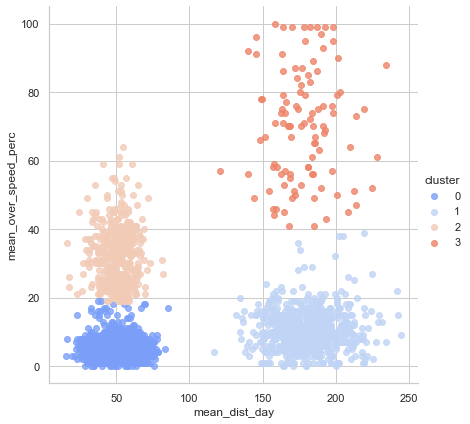

In [27]:
#we view the distribution of data points in each cluster
df_analyze['cluster']=kmeans.labels_
sb.set_style('whitegrid')
sb.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)